### PNI Biomath 2017
# Class 2 Exercises
---
### Using Jupyter Notebooks:
To run a cell and advance to the next cell, press `Shift + Return`

To run a cell without advancing to the next cell, press `Control + Return` 

You can find a variety of shortcuts at **Keyboard Shortcuts** in the Help menu above

**If you're confused:** Google and Python are the best of friends! Throw a few words describing your problem into Google and click on the first Stack Overflow link — this will solve 95% of your problems!

If you would simply like to know more about a particular function, press `Shift + Tab` while inside the function to bring up a snippet of documentation; press `Tab` again (while still holding `Shift`) to bring up an even larger box of documentation; a third press of `Tab` will turn the bottom half of your screen into a window with the full documentation for your function (including definitions of the function's inputs, outputs, parameters and their default settings, and often some example code!)

---

Before we start let's run some magic commands to automatically save our progress once a second (with `%autosave 1`) and force all graphics from the `matplotlib` package to be displayed inline (with `%matplotlib inline`)

In [2]:
%autosave 1
%matplotlib inline

Autosaving every 1 seconds


**1)** Use the Python function given to you below, `myrand`, to write your own n-sided `dice` function. That is, write a
function that outputs an integer from 1 to *n* with equal probability. Allow the user to specify the value *n*.

In [1]:
### Using the function myrand(), define your own dice(n) function below
from Day2_Helper import myrand
def dice(n):
    '''
    dice takes a positive integer n as input and returns
    an integer between 0 and n-1 with equal probability
    '''
    return int(n*myrand())

**2)** Expand on your dice function to add a second input parameter *K* that allows the user to
specify the number of rolls of the dice to be returned. The rolls should be returned as
a vector. For example, if you ask for 6 rolls of a 3-sided dice, you might get

> \>\> dice(3,6)

> [1 0 2 2 1 0]



In [25]:
### Expand on your previous function to define dice(n,k) below
def dice(n,k):
    '''
    dice takes positive integers n and k as input and returns
    a list of k integers between 0 and n-1 each drawn with equal probability
    '''
    random_numbers = []
    for i in range(k):
        random_numbers += [int(n*myrand())]
    return random_numbers

dice(3, 10)

[0, 0, 2, 0, 0, 0, 1, 0, 2, 1]

"**3) Histogramming some of your results.** \n",
You'll use `matplotlib`'s `hist()` function in this problem. This function takes a vector of numbers, puts them into bins, and makes a bar plot for how many are in each bin. By default it uses 10 equally spaced bins, but you can use the optional \"bins\" argument to tell it where to put the bin edges. For example, calling it with \"`bins=np.arange(-0.5, 6, 1)`\" will put bin edges at `-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5`; correspondingle, the bin *centers* will be at `0, 1, 2, 3, 4, 5`.  To see an example, run:,

        x = [0, 0, 1, 2, 3, 4, 5, 5, 5, 5]
        plt.hist(x, bins=np.arange(-0.5, 6, 1))

**The problem itself:** Use the function you just wrote to roll your Python dice *K* times, where *K* is some
large number. Use `plt.hist()` to make a histogram the number of times you got `dice=1`, `dice=2`, `dice=3`, ... , `dice=n`. If the distribution is uniform, the fraction of rolls that came out in each of these bins should be 1/*n*. Are you close to that?


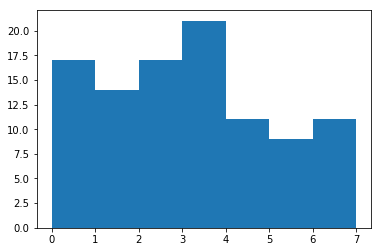

In [11]:
### Call your function K times and then plot the results as a histogram below
from matplotlib import pyplot as plt
n = 7
k = 100
rolls = dice(n, k)
plt.hist(rolls, bins = range(n+1));

**4)** To assess the answer to the previous question quantitatively, compute *E*, the mean
squared difference between the expected fraction (1/*n*) and each of the values you obtained. In other words, compute the mean, over all the histogram bins, of 

$$(\frac{1}{n} - \frac{\text{bin height}}{K})^2$$

To do this, you can use the `np.mean()` function, as well as the fact that NumPy arrays allows arithmetic operations on vectors (for example, if `vec = [1 2 3]`, `vec + 1 = [2 3 4]`).

In [12]:
### Write code to calculate E below
### TIP: It may be useful to change the output of dice from a list to a numpy array
import numpy as np
def E(rolls, n, k):
    bin_height = np.bincount(rolls)
    diffs = 1./n - bin_height/k
    return np.mean(diffs**2)

n = 5
k = 100
rolls = dice(n,k)
MSE = E(rolls,n,k)
print('Mean-squared error:', MSE)

Mean-squared error: 0.00152


**5)** Compute *E* for many different *K*s, and make a plot of *E* as a function of *K*. What do
you observe?

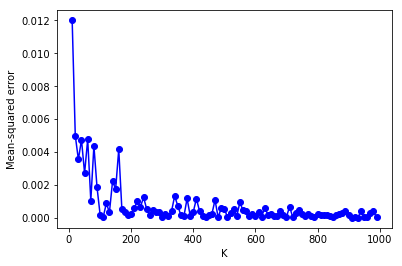

In [13]:
### Write code to compute E's and plot below
### TIP: since you're computing E many times, it would be useful if your solution to #4 were a function
n = 5
Ks = np.arange(10,1000, 10)
MSEs = []

for k in Ks:
    rolls = dice(n,k)
    MSEs += [E(rolls,n,k)]

plt.plot(Ks, MSEs, 'bo-')
plt.xlabel('K')
plt.ylabel('Mean-squared error')

**6)** The Day_2 folder containing this notebook also contains a file called `joyce.mat`. Within Python, you can load easily MATLAB data using the SciPy function `loadmat()`, done for you below. This will create a variable called `mystring` that contains some text. We also define a new string called `vowels`.


Using a loop through the elements of your `vowels` string, compute how many times
each vowel appears in the text of `mystring` (i.e., how many ‘a’, how many ‘e’, how many ‘i’,
etc.). 

In [14]:
### Here we load the string from the .mat file for you (try printing mystring to see what it says!)
from scipy.io import loadmat
mystring = loadmat('joyce.mat')['str'][0]
vowels = 'aeiou'

In [15]:
### Count how many times each vowel appears in mystring below
for v in vowels:
    count = 0
    for c in mystring:
        if c == v:
            count += 1
    print(v, count)

a 126
e 200
i 98
o 104
u 34


**7)** Write a `first_sentence` function that takes a string as input, then extracts and returns the first
sentence of the string (i.e., all the characters up to and including the first period; if the
string contains no period, then return the original string).

In [16]:
### Define your function first_sentence below
def first_sentence(s):
    first = ''
    for c in s:
        first += c
        if c == '.':
            break
    return first
            
first_sentence(mystring)

'The air of the room chilled his shoulders.'

**8)** Write a function `replacer` that takes a string as input,
replaces every letter “e” with an “X”, and returns the new string. Use your
`first_sentence` to test your new `replacer` function with the first sentence of the
text. Then use `replacer` on the entire text.

In [17]:
### Define your function replacer below
def replacer(s):
    new_s = ''
    for c in s:
        if c == 'e':
            new_s += 'X'
        else:
            new_s += c
    return new_s

print(replacer(first_sentence(mystring)))
print()
print(replacer(mystring))

ThX air of thX room chillXd his shouldXrs.

ThX air of thX room chillXd his shouldXrs. HX strXtchXd
himsXlf cautiously along undXr thX shXXts and lay down
bXsidX his wifX. OnX by onX, thXy wXrX all bXcoming
shadXs. BXttXr pass boldly into that othXr world, in
thX full glory of somX passion, than fadX and withXr
dismally with agX. HX thought of how shX who lay bXsidX
him had lockXd in hXr hXart for so many yXars that imagX
of hXr lovXr's XyXs whXn hX had told hXr that hX did
not wish to livX.

GXnXrous tXars fillXd GabriXl's XyXs. HX had nXvXr fXlt
likX that himsXlf towards any woman, but hX knXw that such
a fXXling must bX lovX. ThX tXars gathXrXd morX thickly in
his XyXs and in thX partial darknXss hX imaginXd hX saw thX
form of a young man standing undXr a dripping trXX. OthXr
forms wXrX nXar. His soul had approachXd that rXgion whXrX
dwXll thX vast hosts of thX dXad. HX was conscious of, but
could not apprXhXnd, thXir wayward and flickXring XxistXncX.
His own idXntity was fading out

**8b)** Write a second version of your solution to problem 8, but this time the function should use list comprehension.

Hint 1: in Python, strings are iterables, meaning you can iterate through the letters like you would through the elements of a list. 

Hint 2: if you have a list of characters, you can convert it to a string using the ```join``` method. Here is an example:

In [18]:
my_string = 'hello world'
print(my_string)

for char in my_string:
    print(char)

my_string_as_a_list = list(my_string)
print(my_string_as_a_list)

my_string_as_a_string_again = ''.join(my_string_as_a_list)
print(my_string_as_a_string_again)

hello world
h
e
l
l
o
 
w
o
r
l
d
['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']
hello world


In [19]:
# write and test another solution to problem 8 using list comprehension
def replacer2(s):
    return ''.join([char if char!='e' else 'X' for char in s])

print(replacer2(first_sentence(mystring)))
print()
print(replacer2(mystring))

ThX air of thX room chillXd his shouldXrs.

ThX air of thX room chillXd his shouldXrs. HX strXtchXd
himsXlf cautiously along undXr thX shXXts and lay down
bXsidX his wifX. OnX by onX, thXy wXrX all bXcoming
shadXs. BXttXr pass boldly into that othXr world, in
thX full glory of somX passion, than fadX and withXr
dismally with agX. HX thought of how shX who lay bXsidX
him had lockXd in hXr hXart for so many yXars that imagX
of hXr lovXr's XyXs whXn hX had told hXr that hX did
not wish to livX.

GXnXrous tXars fillXd GabriXl's XyXs. HX had nXvXr fXlt
likX that himsXlf towards any woman, but hX knXw that such
a fXXling must bX lovX. ThX tXars gathXrXd morX thickly in
his XyXs and in thX partial darknXss hX imaginXd hX saw thX
form of a young man standing undXr a dripping trXX. OthXr
forms wXrX nXar. His soul had approachXd that rXgion whXrX
dwXll thX vast hosts of thX dXad. HX was conscious of, but
could not apprXhXnd, thXir wayward and flickXring XxistXncX.
His own idXntity was fading out

**9)** We’re going to examine the text you loaded from the `joyce.mat` file again. Expand
your function from problem 6 so that now you count the frequency of occurrence of
every character in the text file. To help you do this, the function `unique` has been provided below.
This function takes a string and returns a unique sorted list of each of the values in the vector. For example,

> \>\> unique(‘open sesame’)

> ‘ aemnops’

Note how the space character, ' ', is included. All special charcaters will be included and uppercase letters will be treated as different then lowercase letters.


**10)** Plotting a damped oscillator.

**A)** Generate a function that takes as an input a numpy array. It then performs the following operation on the input:

$$exp(-x) + cos(x)$$

Plot the output of the function. Use appropriate ranges and stepsizes for your input to generate a smooth and nice-looking plot!  Don't hesistate to manpulate the axes to make the plot easy on the eyes! (hint, use the functions in numpy to execute the appropriate operations)

**B)** Expand your function to include two additional arguments, a and b, with default values set in the function input.  Have the function perform the following.

$$exp(-a*x) + cos(b*x)$$

Generate a plot with overlayed examples of different function outputs with different values of $a$ and $b$

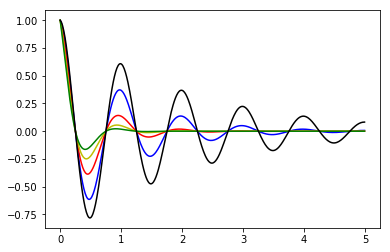

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, a=1, b=1):
    return np.exp(-a*t) * np.cos(2*b*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.01)


plt.plot(t1, f(t1), 'b-')
plt.plot(t1,f(t1, a = 2,b = 1),'r-')
plt.plot(t1,f(t1, a = 3,b = 1),'y-')
plt.plot(t1,f(t1, a = 4,b = 1),'g-')
plt.plot(t1,f(t1, a = .5,b = 1),'k-')
plt.show()

In [ ]:
### Use the provided function to calculate the frequency of every charcter in mystring below
from Day2_Helper import unique
characters = unique(mystring)

character_count = [0]*len(characters)
for c in mystring:
    for v_index, v in enumerate(characters):
        if c == v:
            character_count[v_index] += 1
            break

for v_ind in range(len(characters)):
    print(characters[v_ind], character_count[v_ind])

**10)** Write an equivalent code using a series of *FOR* loops and *IF* statements for the following list comprehension:

> \>\> N = 3

> \>\> M = 2

> mylist = [[[x,y] for x in range(0,N)] for y in range(0,M)]

Remember the order of execution of *FOR* statements in a list comprehension.

In [7]:

N = 3
M = 2

# using list comprehensions
mylist = [[[x,y] for x in range(0,N)] for y in range(0,M)]
print(mylist)

# using FOR statements
mynewlist = []
for y in range(0,M):
    mynewlist.append([])
    for x in range(0,N):
        mynewlist[y] += [[x,y]]
        
print(mynewlist)


[[[0, 0], [1, 0], [2, 0]], [[0, 1], [1, 1], [2, 1]]]
[[[0, 0], [1, 0], [2, 0]], [[0, 1], [1, 1], [2, 1]]]


**11)** (Bonus!) Generate a sequence of prime numbers up to some maximum, max. 

Note) If you use list comprehensions, this can be done in TWO lines of code. 

Hint) First try generating a sequence of non-prime numbers


In [24]:
#The solution I have outlined is computationally redundant, there's likely other solutions...
#First make a list of ints separated by 2, by 3, by 4, by 5. Easily done using a list comprehension.

max = 50

#This will run through 2*2, 2+2*2, 4+2*2..... 3*2, 3+3*2,...4*2, 4*2+4, 4*2+8
noprimes = [j for i in range(2, 8) for j in range(i*2, max, i)] 

#deselect the noprimes
primes = [x for x in range(2, max) if x not in noprimes]

print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
